# Test for a simple regression problem

Created by: Daniel L. Marino (marinodl@vcu.edu)

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import numpy as np

import sys
sys.path.append('../')
from feedforward import *
from Batch_generator import *

## 1. Create Dataset

In [2]:
train_X= np.expand_dims(np.linspace(0,10,100), -1)
train_y= np.sin(train_X)

test_X= np.expand_dims(np.linspace(0,10,1000), -1)
test_y= np.sin(test_X)

n_features= 1

print(train_X.shape)
print(train_y.shape)

(100, 1)
(100, 1)


#### normalization

In [3]:
std_data= np.std(train_X, 0)
mean_data= np.mean(train_X, 0)

for i in range(n_features):
    train_X[:,i]= (train_X[:,i]-mean_data[i])/std_data[i]
    test_X[:,i]= (test_X[:,i]-mean_data[i])/std_data[i]
print(np.std(train_X,0))
print(np.std(test_X,0))

[ 1.]
[ 0.99104005]


## 2. Batch Generators

In [4]:
batch_size = train_X.shape[0] #50
batch_size_test= test_X.shape[0]

## 2. Define the Model

In [5]:
sess = tf.InteractiveSession()

In [6]:
# Network parameters
n_inputs= n_features
n_outputs=  1
n_hidden = [10]

# for dropout
drop_prob = tf.placeholder(tf.float32)

# Define MLP Net
mlp_net= MlpNet( n_inputs, n_outputs, n_hidden, afunction= tf.sigmoid ,name='MlpNet')

# Define train setup
train= mlp_net.setup(batch_size, drop_prob, l2_reg_coef= 0.000001, loss_type='l2')
# Define test setup
test= mlp_net.setup(batch_size_test, drop_prob)


# Optimizer.
optimizer = tf.train.AdamOptimizer(0.5).minimize(train.loss) #0.001

## 3. Train the model

In [7]:
num_steps = 1000 #2000
n_logging = 10
n_test_logg = 10

tf.initialize_all_variables().run()
print('Initialized')

mean_loss= 0
train_accuracy= 0
for step in range(num_steps):
    batch_X= train_X
    batch_y= train_y
    
        
    feed_dict = {train.inputs : batch_X, train.labels : batch_y, drop_prob:1.0}
    
    _, l, train_pred = sess.run([optimizer, train.loss, train.y],feed_dict=feed_dict)
    mean_loss += l    
    
    if step%n_logging == 0:                
        # test
        pred = test.y.eval(feed_dict={test.inputs: test_X, drop_prob: 1.0})
            
        test_error = np.sum( np.power(pred-test_y, 2.0) )/2.0
        
        # print            
        print(step, ' | test:', test_error, ' | loss:', mean_loss/n_logging)
        mean_loss= 0
        

Initialized
0  | test: 3985.10410767  | loss: 2.50955581665
10  | test: 296.753705273  | loss: 99.2223274231
20  | test: 222.233831467  | loss: 32.6873666763
30  | test: 224.026792956  | loss: 25.220472908
40  | test: 222.710848631  | loss: 23.0846406937
50  | test: 222.746784235  | loss: 22.3601423264
60  | test: 221.703755996  | loss: 22.1791469574
70  | test: 221.251062713  | loss: 22.0970159531
80  | test: 220.540600664  | loss: 22.0365251541
90  | test: 219.677729488  | loss: 21.9581121445
100  | test: 218.52370915  | loss: 21.8463508606
110  | test: 216.700978073  | loss: 21.7129173279
120  | test: 212.668072497  | loss: 21.4639127731
130  | test: 187.927627398  | loss: 20.4846094131
140  | test: 171.223567614  | loss: 17.3518924713
150  | test: 164.308141139  | loss: 16.7694032669
160  | test: 161.934685576  | loss: 16.1560842514
170  | test: 160.451671622  | loss: 15.9632411003
180  | test: 159.455909894  | loss: 15.8576251984
190  | test: 158.712108224  | loss: 15.7687107086
2

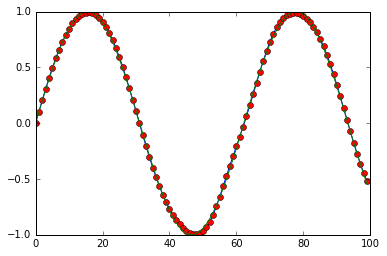

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

pred = train.y.eval(feed_dict={train.inputs: train_X, drop_prob: 1.0})

plt.plot(np.arange(pred.shape[0]), pred)
plt.plot(np.arange(pred.shape[0]), pred, 'ro')

plt.plot(np.arange(train_y.shape[0]), train_y)


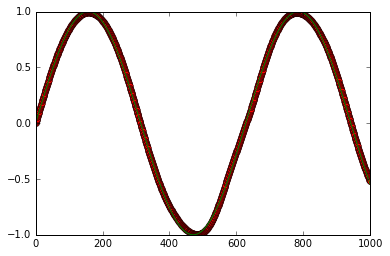

In [9]:
pred = test.y.eval(feed_dict={test.inputs: test_X, drop_prob: 1.0})

plt.plot(np.arange(pred.shape[0]), pred)
plt.plot(np.arange(pred.shape[0]), pred, 'ro')
plt.plot(np.arange(test_y.shape[0]), test_y)
